<a href="https://colab.research.google.com/github/ssoto123/tinyml/blob/main/Tiny_ml_esp32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install --upgrade paho-mqtt

In [26]:
!pip install tqdm

In [27]:
import paho.mqtt.client as mqtt #import the client1
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [28]:
l_mqtt = []

In [29]:
def on_message(client, userdata, message):
    global l_mqtt

    msg = str(message.payload.decode("utf-8"))
    print("message received " , msg)
    l_mqtt.append(msg)
    #print("message topic=",message.topic)
    #print("message qos=",message.qos)
    #print("message retain flag=",message.retain)

In [30]:
def run_mqtt():
    broker_address="broker.hivemq.com"
    print("creating new instance")

    client = mqtt.Client(client_id ='esp32_recv')
         #create new instance
    client.on_message=on_message #attach function to callback
    client.connect(broker_address) #connect to broker

    client.loop_start() #start the loop

    print("Subscribing to topic","mpu6050/ml")
    client.subscribe("IA/mpu6050/ml")

    #print("Publishing message to topic","house/bulbs/bulb1")
    #client.publish("house/bulbs/bulb1","OFF")

    #time.sleep(4) # wait
    #client.loop_stop() #stop the loop
    #client.loop_start()
    return client

In [37]:
client = run_mqtt()

creating new instance
Subscribing to topic mpu6050/ml


<ipython-input-30-732621967a7d>:5: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client(client_id ='esp32_recv')


In [36]:
client.loop_stop()

print(l_mqtt)

['(0.407014,-0.183156,10.047267,-0.031309,0.000133,0.021051)', '(0.391452,-0.186748,10.068815,-0.030910,-0.000799,0.022383)']


In [33]:
t_aux = np.zeros((1,6))

for i in l_mqtt:
    t_aux = np.append(t_aux, np.array([eval(i)]), axis=0)
t_aux

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 4.0701400e-01, -1.8315600e-01,  1.0047267e+01, -3.1309000e-02,
         1.3300000e-04,  2.1051000e-02]])

In [15]:
f1 = t_aux.copy()
f1

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 1.9871900e-01, -1.7717100e-01,  1.0086772e+01, -3.1975000e-02,
        -9.3300000e-04,  2.3182000e-02]])

In [19]:
f2 = t_aux.copy()
f2

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 1.9871900e-01, -1.7717100e-01,  1.0086772e+01, -3.1975000e-02,
        -9.3300000e-04,  2.3182000e-02]])

In [ ]:
#f3 = t_aux.copy()
#f3

In [20]:
f1 = f1[1:]
f1

array([[ 1.9871900e-01, -1.7717100e-01,  1.0086772e+01, -3.1975000e-02,
        -9.3300000e-04,  2.3182000e-02]])

In [22]:
f2 = f2[1:]
#f3 = f3[1:]

In [23]:
df1 = pd.DataFrame(f1, columns=('ax','ay','az','gx','gy','gz'))
df1['target'] = 0
df1.head()

,ax,ay,az,gx,gy,gz,target
0,0.198719,-0.177171,10.086772,-0.031975,-0.000933,0.023182,0


In [24]:
df2 = pd.DataFrame(f2, columns=('ax','ay','az','gx','gy','gz'))
df2['target'] = 1
df2.head()

,ax,ay,az,gx,gy,gz,target


In [ ]:
#df3 = pd.DataFrame(f3, columns=('ax','ay','az','gx','gy','gz'))
#df3['target'] = 2
#df3.head()

In [ ]:
df = pd.concat([df1,df2], axis=0)
df

,ax,ay,az,gx,gy,gz,target
0,0.445322,-0.111330,10.062830,-0.030243,-0.000266,0.022250,0
1,0.430956,-0.118513,10.074800,-0.030643,-0.001865,0.022516,0
2,0.422577,-0.102951,10.103531,-0.031043,-0.001466,0.022516,0
3,10.170568,-0.199916,-0.424971,-0.031176,-0.001199,0.023049,0
4,10.175357,-0.223858,-0.428562,-0.030377,0.000133,0.023315,0
...,...,...,...,...,...,...,...
54,-9.421184,-0.131681,0.581791,-0.032109,-0.000266,0.023982,1
55,-9.434352,-0.122104,0.560243,-0.031443,-0.002132,0.023449,1
56,-9.439140,-0.137667,0.579397,-0.032109,-0.000400,0.023449,1
57,9.894038,-0.221464,-2.369063,-0.032508,-0.000133,0.023982,1


In [ ]:
df.to_csv("mpu6050_mov1.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("mpu9250_mov1.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'mpu9250_mov1.csv'

In [ ]:
df.describe()

,ax,ay,az,gx,gy,gz,target
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.715445,-0.143093,5.995879,-0.030732,-0.000897,0.022756,1.266667
std,6.263794,0.045799,5.185318,0.000379,0.000800,0.000456,0.798809
min,-9.436746,-0.223858,-0.428562,-0.031309,-0.001865,0.022250,0.000000
25%,0.422577,-0.178368,0.016759,-0.031043,-0.001466,0.022516,1.000000
50%,0.430956,-0.118513,10.062830,-0.030643,-0.001199,0.022516,1.000000
75%,5.307945,-0.111330,10.074800,-0.030377,-0.000266,0.023049,2.000000
max,10.175357,-0.102951,10.103531,-0.030243,0.000400,0.023715,2.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,:-1])

StandardScaler()

In [ ]:
dfs = scaler.transform(df.iloc[:,:-1]).copy()
dfs

array([[-0.20988921,  0.7178818 ,  0.81184878,  1.33466026,  0.81631279,
        -1.14734902],
       [-0.21226321,  0.55553979,  0.81423825,  0.24261586, -1.2520648 ,
        -0.54403819],
       [-0.21364785,  0.90725444,  0.81997356, -0.84942853, -0.73594056,
        -0.54403819],
       [-0.20988921,  0.7178818 ,  0.81184878,  1.33466026,  0.81631279,
        -1.14734902],
       [-0.21226321,  0.55553979,  0.81423825,  0.24261586, -1.2520648 ,
        -0.54403819],
       [-0.21364785,  0.90725444,  0.81997356, -0.84942853, -0.73594056,
        -0.54403819],
       [ 1.39721771, -1.28423837, -1.28173643, -1.21253329, -0.39056419,
         0.66485156],
       [ 1.39800909, -1.82534826, -1.28245327,  0.96882539,  1.33243703,
         1.26816239],
       [-0.20988921,  0.7178818 ,  0.81184878,  1.33466026,  0.81631279,
        -1.14734902],
       [-0.21226321,  0.55553979,  0.81423825,  0.24261586, -1.2520648 ,
        -0.54403819],
       [-0.21364785,  0.90725444,  0.81997356, -0.

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfs[:,:], df['target'], random_state=0)

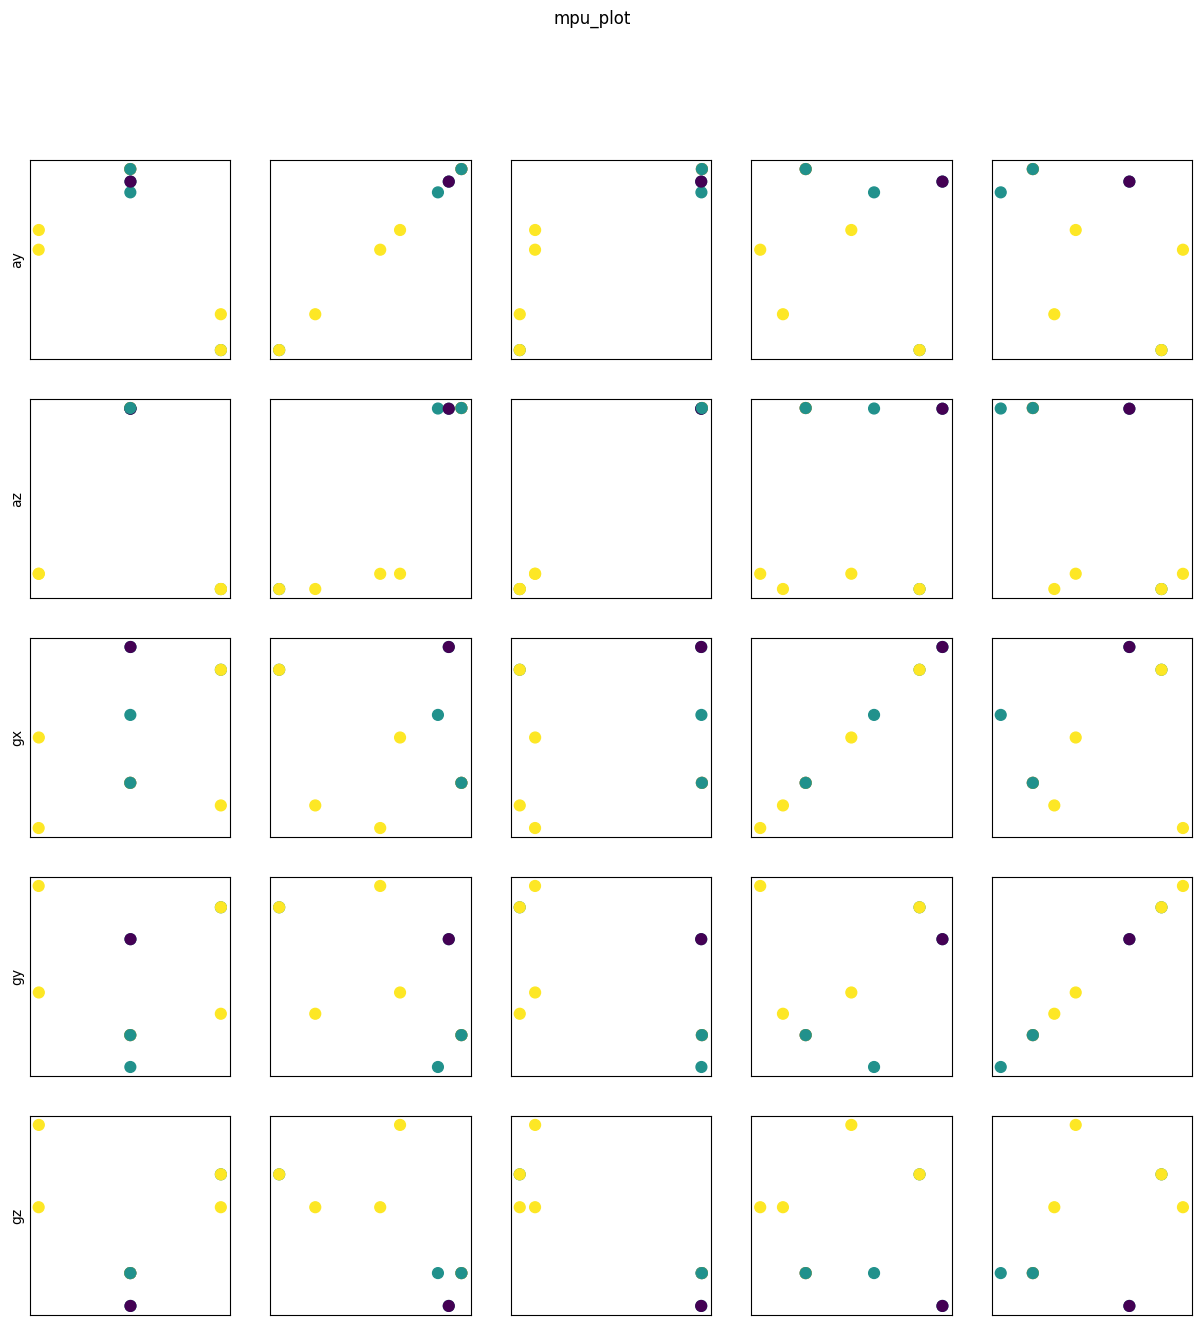

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(15,15))
plt.suptitle("mpu_plot")

for i in range(5):
    for j in range(5):
        ax[i,j].scatter(X_train[:,j], X_train[:,i+1], c=y_train,s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())

        if i==7:
            ax[i,j].set_xlabel(df.columns[j])
        if j==0:
            ax[i,j].set_ylabel(df.columns[i+1])

In [ ]:
# Assuming 'X_train' and 'y_train' are your training data
# Define a Keras model
model = keras.Sequential([
    keras.layers.Dense(2, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')  # Adjust number of units and activation as needed
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) # Adjust optimizer and loss as needed

# Train the Keras model
history = model.fit(X_train, y_train, epochs=500, verbose=1,validation_split=0.1) # Adjust epochs as needed

# Convert Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TensorFlow Lite model
open("knn_mpu6050.tflite", "wb").write(tflite_model)

NameError: name 'keras' is not defined

In [ ]:
,import matplotlib.pyplot as plt

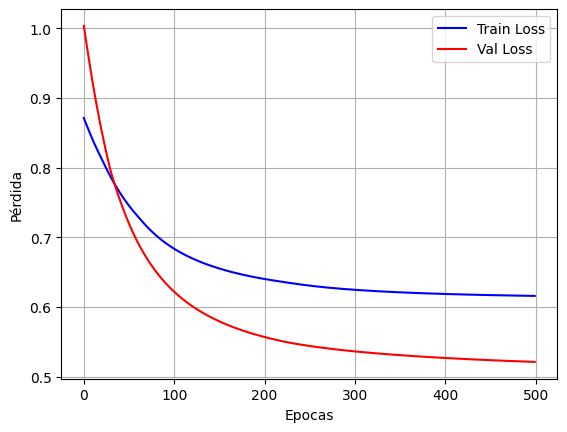

In [ ]:
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.plot(history.epoch, np.array(history.history['loss']),'b', label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_loss']), 'r', label = 'Val Loss')
plt.legend()
plt.grid()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test,verbose=1)
print('Exactitud de prueba: ', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2500 - loss: 1.0668
Exactitud de prueba:  0.25


In [ ]:
#Prediccion

accel = np.array([[10.18,-0.19,-0.45,-0.03,-0.00,0.02]])

predict = model.predict(accel)
print(f" Salida predicha: {predict}")


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
 Salida predicha: [[0.9999874]]


In [ ]:
import pickle
from tensorflow.keras.models import Sequential

In [ ]:
pickle.dump(Sequential, open("Sequential_mpu9050.keras", "wb"))

In [ ]:
model.save('./Sequential_mpu9050.keras')


In [ ]:
load_model = tf.keras.models.load_model("Sequential_mpu9050.keras")

converter = tf.lite.TFLiteConverter.from_keras_model(load_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

open("Sequential_mpu9050.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpt5ho3aek'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134792975851488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134792975853952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134792975857824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134792975856416: TensorSpec(shape=(), dtype=tf.resource, name=None)


2012

In [ ]:
!apt-get -qq install xxd

In [ ]:
!xxd -i Sequential_mpu9050.tflite > Sequential_mpu9050.h


In [ ]:
from arduinoKeras import weights
from arduinoKeras import layers
from arduinoKeras import scaling

In [ ]:
# Extraer valores pesos,normalizacion y la arquitectura de la red para Arduino
weights(model.layers,3)
scaling(scaler,3)
layers(model.layers)
plt.show()




///////////////////////////////// Variables Red Neuronal /////////////////////////////////
double a0[6];
double W1[10][6] = {{0.299,-0.356,-0.386,-0.465,0.304,-0.354},{-0.688,0.608,-0.006,-0.457,-0.633,-0.205},{-0.138,-0.161,-0.727,0.038,0.28,0.186},{0.507,0.485,-0.683,-0.678,0.038,-0.476},{0.137,-0.768,-0.722,-0.367,-0.191,0.66},{-0.805,0.166,0.358,-0.493,-0.033,0.617},{0.256,-0.104,0.338,0.024,0.364,0.278},{-0.569,-0.816,-0.221,-0.186,0.335,0.039},{0.556,0.007,0.037,0.083,-0.268,-0.137},{0.094,0.231,0.015,0.164,0.187,-0.095}};
double a1[10];
double W2[1][10] = {{0.638,0.741,0.736,0.696,0.271,0.52,-0.41,0.352,1.018,-0.646}};
double a2[1]; 
double b1[10]= {0.143,0.291,0.166,0.178,0.217,0.225,-0.09,0.286,0.3,0.022};
double b2[1]= {0.185};
double aux = 0.0;
//////////////////////////////////////////////////////////////////



///////////////////////////////// Preprocesamiento Red Neuronal /////////////////////////////////
double mean[6]={1.715,-0.143,5.996,-0.031,-0.001,0.023};
double 